In [54]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.externals import joblib

%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer

from tools import plot_confusion_matrix

In [55]:
df = pd.read_csv('../data/datatran_2016-2017.csv')
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(184224, 32)

In [30]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,8,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI ...,Fenômenos da Natureza ...,Queda de ocupante de veículo ...,...,1,0,0,1,1,-23.098807,-52.387894,SR-PR,DEL7/7,UOP05/PR
1,9,2017-01-01,domingo,00:01:00,SC,101.0,234,PALHOCA ...,Falta de Atenção à Condução ...,Colisão com objeto estático ...,...,0,1,0,0,1,-27.810100,-48.635700,SR-SC,DEL8/1,UOP02/SC
2,11,2017-01-01,domingo,00:00:00,PR,153.0,"56,9",SANTO ANTONIO DA PLATINA ...,Animais na Pista ...,Capotamento ...,...,0,0,0,2,1,-23.369520,309.935131,SR-PR,DEL7/7,UOP07/PR
3,12,2017-01-01,domingo,00:00:00,GO,153.0,435,ANAPOLIS ...,Avarias e/ou desgaste excessivo no pneu ...,Tombamento ...,...,1,0,0,1,1,-16.274737,-48.969090,SR-GO,DEL1/2,UOP01/GO
4,13,2017-01-01,domingo,00:00:00,SC,280.0,"77,3",CORUPA ...,Ingestão de Álcool ...,Saída de leito carroçável ...,...,0,0,0,1,1,-26.446752,-49.201670,SR-SC,DEL8/6,UOP03/SC


In [56]:
dd = df[['dia_semana', 'uf', 'br', 'km', 'causa_acidente', 'tipo_acidente', 
        'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'target']]
dd.dropna(inplace=True)

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB(priors=None)

In [62]:
joblib.dump(model, '../model/modelo_v0_gaussianNB.pkl') 

['../model/modelo_v0_gaussianNB.pkl']

In [63]:
y_pred = model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.1903028656797501

Confusion matrix, without normalization
[[ 2403  1741  8959]
 [ 2934  3177 15512]
 [  289   374  1426]]


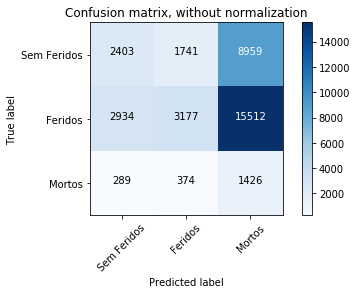

In [65]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [66]:
precision0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[1,2])
recall0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[0,2])

print('Precision classe de sem vítimas: ', precision0)
print('Recall classe de sem vítimas: ', recall0)
print('F1 classe de sem vítimas: ', 1 * ((precision0 * recall0) / (precision0 + recall0)))
print('---')

precision1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[2,1])
recall1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0] + cnf_matrix[1,2])

print('Precision classe de feridos: ', precision1)
print('Recall classe de feridos: ', recall1)
print('F1 classe de feridos: ', 1 * ((precision1 * recall1) / (precision1 + recall1)))
print('---')

precision2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[0,2] + cnf_matrix[1,2])
recall2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[2,0] + cnf_matrix[2,1])

print('Precision classe de mortos: ', precision2)
print('Recall classe de mortos: ', recall2)
print('F1 classe de mortos: ', 1 * ((precision2 * recall2) / (precision2 + recall2)))

Precision classe de sem vítimas:  0.11525732649047916
Recall classe de sem vítimas:  0.18339311608028697
F1 classe de sem vítimas:  0.07077639019792649
---
Precision classe de feridos:  0.6003401360544217
Recall classe de feridos:  0.14692688341118254
F1 classe de feridos:  0.11803826862344417
---
Precision classe de mortos:  0.05506429316137004
Recall classe de mortos:  0.6826232647199617
F1 classe de mortos:  0.05095404845279783
